# Flatiron Phase II Project
### King's County 

## Introduction 

In this cumulative lab you'll perform a full linear regression analysis and report the findings of your final model, including both predictive model performance metrics and interpretation of fitted model parameters.

## Objectives

You will be able to:

* Perform a full linear regression analysis with iterative model development
* Evaluate your final model and interpret its predictive performance metrics
* Apply an inferential lens to interpret relationships between variables identified by the model

## Your Task: Develop a LEGO Pricing Algorithm

![sold](images/SOLD.jpg)


### Business Understanding

You just got hired by LEGO! Your first project is going to be to develop a pricing algorithm to help set a target price for new LEGO sets that are released to market. The goal is to save the company some time and to help ensure consistency in pricing between new products and past products.

The main purpose of this algorithm is *predictive*, meaning that **your model should be able to take in attributes of a LEGO set that does not yet have a set price, and to predict a good price**. The effectiveness of your predictive model will be measured by how well it predicts prices in our test set, where we know what the actual prices were but the model does not.

The secondary purpose of this algorithm is *inferential*, meaning that **your model should be able to tell us something about the relationship between the attributes of a LEGO set and its price**. You will apply your knowledge of statistics to include appropriate caveats about these relationships.

### Data Understanding

You have access to a dataset containing over 700 LEGO sets released in the past, including attributes of those sets as well as their prices. You can assume that the numeric attributes in this dataset have already been preprocessed appropriately for modeling (i.e. that there are no missing or invalid values), while the text attributes are simply there for your visual inspection and should not be used for modeling. Also, note that some of these attributes cannot be used in your analysis because they will be unavailable for future LEGO products or are otherwise irrelevant.

You do not need to worry about inflation or differences in currency; just predict the same kinds of prices as are present in the past data, which have already been converted to USD.

### Loading the Data

In the cells below, we load both the train and test datasets for you. Remember, both of these datasets contain prices, but we are using the test set as a stand-in for future LEGO products where the price has not yet been determined. The model will be trained on just the train set, then we will compare its predictions on the test set to the actual prices on the test set.

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
df = pd.read_csv("data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

BUILDING CONDITION
    	Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.



BUILDING GRADE
    	Represents the construction quality of improvements. Grades run from grade 1 to 13. 
        Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [131]:
##split data into test train here

Some more information about the features of this dataset:

A visualization of the distribution of the target variable:

In [132]:
# # Run this cell without changes

# fig, ax = plt.subplots(figsize=(10, 5))

# ax.hist(y_train, bins=100)

# ax.set_xlabel("Listing Price (USD)")
# ax.set_ylabel("Count of LEGO Sets")
# ax.set_title("Distribution of LEGO Set Prices");

### Requirements

#### 1. Exploratory Data Anaylsis (EDA) & Data Cleaning

You'll start modeling by choosing the feature that is most correlated with our target, and build and evaluate a linear regression model with just that feature.

#### 2. Build a Baseline Model

Now, add in the rest of the relevant numeric features of the training data, and compare that model's performance to the performance of the baseline model.

#### 3. Select the Best Combination of Features

Using statistical properties of the fitted model, the `sklearn.feature_selection` submodule, and some custom code, find the combination of relevant numeric features that produces the best scores.

#### 4. Build and Evaluate a Final Predictive Model

Using the best features selected in the previous step, create a final model, fit it on all rows of the training dataset, and evaluate it on all rows of the test dataset in terms of both r-squared and RMSE.

#### 5. Interpret the Final Model

Determine what, if any, understanding of the underlying relationship between variables can be determined with this model. This means you will need to interpret the model coefficients as well as checking whether the assumptions of linear regression have been met.

## 1. EDA and cleaning

### Interpreting a Correlation Heatmap

The code below produces a heatmap showing the correlations between all of the numeric values in our training data. The x and y axis labels indicate the pair of values that are being compared, and then the color and the number are both representing the correlation. Color is used here to make it easier to find the largest/smallest numbers — you could perform this analysis with just `train.corr()` if all you wanted was the correlation values.

The very left column of the plot is the most important, since it shows correlations between the target (listing price) and other attributes.

In [133]:
import numpy as np

import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_validate, ShuffleSplit

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [135]:
df = df.drop(['id'], axis=1)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [136]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  object        
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipcode        2159

In [137]:
df['month_sold'] = df['date'].dt.month
df['year_sold'] = df['date'].dt.year
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5,2014
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2,2015
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,6,2014
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1,2015


In [138]:
df['age_when_sold'] = df['year_sold'] - df['yr_built']
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age_when_sold
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,63
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2,2015,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,...,2009,0.0,98103,47.6993,-122.346,1530,1509,5,2014,5
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,...,2014,0.0,98146,47.5107,-122.362,1830,7200,2,2015,1
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,...,2009,0.0,98144,47.5944,-122.299,1020,2007,6,2014,5
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,...,2004,0.0,98027,47.5345,-122.069,1410,1287,1,2015,11


In [139]:
df["age_when_sold"].value_counts()

 9      472
 8      443
 11     431
 0      430
 10     428
       ... 
 113     28
 115     26
 81      23
 80      21
-1       12
Name: age_when_sold, Length: 117, dtype: int64

In [140]:
df[df["age_when_sold"] == -1]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age_when_sold
1761,2014-06-25,597326.0,4,4.00,3570,8250,2.0,NO,NONE,Average,...,2015,NaN,98040,47.5784,-122.226,2230,10000,6,2014,-1
2685,2014-10-29,385195.0,1,1.00,710,6000,1.5,NO,NONE,Average,...,2015,NaN,98144,47.5756,-122.316,1440,4800,10,2014,-1
7519,2014-12-31,614285.0,5,2.75,2730,6401,2.0,NO,NONE,Average,...,2015,0.0,98072,47.7685,-122.160,2520,6126,12,2014,-1
8032,2014-06-24,455000.0,2,1.50,1200,1259,2.0,NO,NONE,Average,...,2015,NaN,98144,47.6001,-122.298,1320,1852,6,2014,-1
14475,2014-08-26,500000.0,2,2.25,1570,1269,2.0,NaN,NONE,Average,...,2015,NaN,98199,47.6514,-122.385,1570,6000,8,2014,-1
17084,2014-06-17,350000.0,3,2.00,1380,3600,3.0,NaN,NONE,Average,...,2015,0.0,98122,47.6074,-122.305,1480,3600,6,2014,-1
19789,2014-08-01,455000.0,3,1.75,1320,1014,3.0,NO,NONE,Average,...,2015,0.0,98122,47.6047,-122.305,1380,1495,8,2014,-1
20754,2014-08-28,357000.0,5,2.50,2990,9240,2.0,NO,NONE,Average,...,2015,0.0,98133,47.7384,-122.348,1970,18110,8,2014,-1
20836,2014-07-09,595000.0,4,3.25,3730,4560,2.0,NO,NONE,Average,...,2015,0.0,98103,47.6725,-122.330,1800,4560,7,2014,-1
20947,2014-07-31,230000.0,3,1.50,1040,1264,2.0,NO,NONE,Average,...,2015,0.0,98144,47.5951,-122.301,1350,3000,7,2014,-1


In [141]:
df['age_when_sold'] = df['age_when_sold'].apply(lambda x: 0 if x == -1 else x)

In [142]:
df["age_when_sold"].value_counts()

9      472
8      443
0      442
11     431
10     428
      ... 
112     33
113     28
115     26
81      23
80      21
Name: age_when_sold, Length: 116, dtype: int64

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  object        
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipcode        2159

In [144]:
df[['sqft_living','sqft_lot','sqft_above','sqft_basement']].head(15)

,sqft_living,sqft_lot,sqft_above,sqft_basement
0,1180,5650,1180,0.0
1,2570,7242,2170,400.0
2,770,10000,770,0.0
3,1960,5000,1050,910.0
4,1680,8080,1680,0.0
5,5420,101930,3890,1530.0
6,1715,6819,1715,?
7,1060,9711,1060,0.0
8,1780,7470,1050,730.0
9,1890,6560,1890,0.0


In [145]:
df.loc[df['sqft_basement'] == '?'][['sqft_living','sqft_lot','sqft_above','sqft_basement']]

,sqft_living,sqft_lot,sqft_above,sqft_basement
6,1715,6819,1715,?
18,1200,9850,1200,?
42,3595,5639,3595,?
79,3450,39683,3450,?
112,1540,12600,1160,?
...,...,...,...,...
21442,2360,5000,1390,?
21447,2330,4907,2330,?
21473,980,1010,980,?
21519,2380,5737,2380,?


In [146]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [147]:
df['sqft_basement'].value_counts(normalize=True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
1920.0    0.000046
3480.0    0.000046
2730.0    0.000046
2720.0    0.000046
248.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [148]:
df['sqft_basement'] = df['sqft_living'] - df['sqft_above'] 

In [149]:
df['sqft_basement'].value_counts(normalize=True)

0      0.607029
600    0.010233
700    0.010094
500    0.009909
800    0.009538
         ...   
518    0.000046
374    0.000046
784    0.000046
906    0.000046
248    0.000046
Name: sqft_basement, Length: 306, dtype: float64

In [150]:
df[['sqft_living','sqft_lot','sqft_above','sqft_basement']].head(10)

,sqft_living,sqft_lot,sqft_above,sqft_basement
0,1180,5650,1180,0
1,2570,7242,2170,400
2,770,10000,770,0
3,1960,5000,1050,910
4,1680,8080,1680,0
5,5420,101930,3890,1530
6,1715,6819,1715,0
7,1060,9711,1060,0
8,1780,7470,1050,730
9,1890,6560,1890,0


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipcode        2159

In [152]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [153]:
df['waterfront'].isna().sum()

2376

In [154]:
df['waterfront'].fillna('NO', inplace=True)
df['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [155]:
df['waterfront'] = df['waterfront'].map(lambda x: 1 if x == 'YES' else 0)
df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipcode        2159

In [157]:
df['yr_renovated'].isna().sum()

3842

In [158]:
df['yr_renovated'].describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [159]:
df['yr_renovated'].fillna(0.0, inplace=True)

In [160]:
df['yr_renovated'].describe()

count    21597.000000
mean        68.758207
std        364.037499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [161]:
df['yr_renovated'].value_counts(normalize=True)

0.0       0.965551
2014.0    0.003380
2013.0    0.001435
2003.0    0.001435
2007.0    0.001389
            ...   
1951.0    0.000046
1953.0    0.000046
1946.0    0.000046
1976.0    0.000046
1948.0    0.000046
Name: yr_renovated, Length: 70, dtype: float64

In [162]:
def reno(year):
    if year > 1:
        return 1
    else:
        return 0

df['recent_reno']  = df['yr_renovated'].apply(reno)

In [163]:
df['recent_reno'].sum()

744

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  float64       
 15  zipcode        2159

In [165]:
df = df.drop(['date', 'yr_built','yr_renovated' ], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age_when_sold,recent_reno
0,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7 Average,...,0,98178,47.5112,-122.257,1340,5650,10,2014,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,NONE,Average,7 Average,...,400,98125,47.7210,-122.319,1690,7639,12,2014,63,1
2,180000.0,2,1.00,770,10000,1.0,0,NONE,Average,6 Low Average,...,0,98028,47.7379,-122.233,2720,8062,2,2015,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,NONE,Very Good,7 Average,...,910,98136,47.5208,-122.393,1360,5000,12,2014,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,NONE,Average,8 Good,...,0,98074,47.6168,-122.045,1800,7503,2,2015,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,NONE,Average,8 Good,...,0,98103,47.6993,-122.346,1530,1509,5,2014,5,0
21593,400000.0,4,2.50,2310,5813,2.0,0,NONE,Average,8 Good,...,0,98146,47.5107,-122.362,1830,7200,2,2015,1,0
21594,402101.0,2,0.75,1020,1350,2.0,0,NONE,Average,7 Average,...,0,98144,47.5944,-122.299,1020,2007,6,2014,5,0
21595,400000.0,3,2.50,1600,2388,2.0,0,NONE,Average,8 Good,...,0,98027,47.5345,-122.069,1410,1287,1,2015,11,0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21534 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  zipcode        21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
 17  month_sold     21597 non-null  int64  
 18  year_s

In [167]:
df["grade"]

0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21597, dtype: object

In [168]:
df["grade"].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [169]:
df["condition"]

0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21597, dtype: object

In [170]:
df['condition'].isna().sum()

0

In [171]:
df["condition"].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [172]:
condition_key = {'Poor':1.0 , 'Fair':2.0 , 'Average':3.0 , 'Good':4.0 , 'Very Good':5.0}

In [173]:
grade_key = {'3 Poor':3.0,
             '4 Low':4.0,
             '5 Fair':5.0,
             '6 Low Average':6.0,
             '7 Average': 7.0,
             '8 Good':8.0,
             '9 Better':9.0,
             '10 Very Good':10.0,
             '11 Excellent':11.0,
             '12 Luxury': 12.0,
             '13 Mansion':13.0}

In [174]:
view_key = {'NONE':1.0 , 'AVERAGE':2.0 , 'GOOD':3.0 , 'FAIR':4.0 , 'EXCELLENT':5.0}

In [175]:
df['condition'] = df['condition'].replace(condition_key)

In [176]:
df['grade'] = df['grade'].replace(grade_key)

In [177]:
df['view'] = df['view'].replace(view_key)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21534 non-null  float64
 8   condition      21597 non-null  float64
 9   grade          21597 non-null  float64
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  zipcode        21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
 17  month_sold     21597 non-null  int64  
 18  year_s

In [179]:
df = df.drop('year_sold', axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,age_when_sold,recent_reno
0,221900.0,3,1.00,1180,5650,1.0,0,1.0,3.0,7.0,1180,0,98178,47.5112,-122.257,1340,5650,10,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,1.0,3.0,7.0,2170,400,98125,47.7210,-122.319,1690,7639,12,63,1
2,180000.0,2,1.00,770,10000,1.0,0,1.0,3.0,6.0,770,0,98028,47.7379,-122.233,2720,8062,2,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,1.0,5.0,7.0,1050,910,98136,47.5208,-122.393,1360,5000,12,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,1.0,3.0,8.0,1680,0,98074,47.6168,-122.045,1800,7503,2,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,1.0,3.0,8.0,1530,0,98103,47.6993,-122.346,1530,1509,5,5,0
21593,400000.0,4,2.50,2310,5813,2.0,0,1.0,3.0,8.0,2310,0,98146,47.5107,-122.362,1830,7200,2,1,0
21594,402101.0,2,0.75,1020,1350,2.0,0,1.0,3.0,7.0,1020,0,98144,47.5944,-122.299,1020,2007,6,5,0
21595,400000.0,3,2.50,1600,2388,2.0,0,1.0,3.0,8.0,1600,0,98027,47.5345,-122.069,1410,1287,1,11,0


In [180]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.006760,0.081944,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21534.0,1.196480,0.688242,1.0000,1.0000,1.0000,1.000,5.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01


In [181]:
df['view'].value_counts(normalize=True)

1.0    0.901923
2.0    0.044441
3.0    0.023591
4.0    0.015325
5.0    0.014721
Name: view, dtype: float64

In [182]:
df['view'].fillna(1.0, inplace=True)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  float64
 8   condition      21597 non-null  float64
 9   grade          21597 non-null  float64
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  zipcode        21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
 17  month_sold     21597 non-null  int64  
 18  age_wh

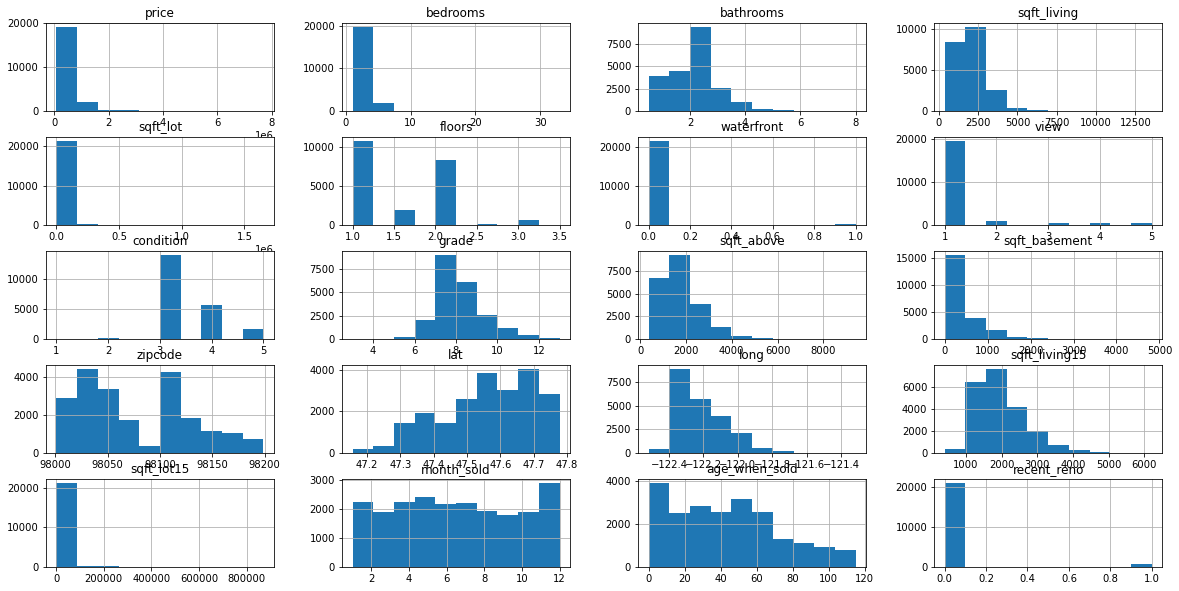

In [184]:
df.hist(figsize  = [20, 10]); 

In [185]:
numerical = ['price', 'sqft_living','sqft_living15', 'sqft_lot','sqft_lot15','sqft_above', 'sqft_basement','lat','long','age_when_sold']

In [186]:
kindaboth = ['bedrooms', 'bathrooms', 'floors']

In [187]:
categorical = ['waterfront', 'view', 'condition', 'grade', 'month_sold','recent_reno','zipcode']

In [188]:
df.shape

(21597, 20)

In [189]:
z = np.abs(stats.zscore(df[numerical+kindaboth]))
z.head(10)

,price,sqft_living,sqft_living15,sqft_lot,sqft_lot15,sqft_above,sqft_basement,lat,long,age_when_sold,bedrooms,bathrooms,floors
0,0.866716,0.980652,0.943676,0.228182,0.260627,0.735251,0.659031,0.352894,0.305695,0.533642,0.402903,1.451073,0.915552
1,0.006252,0.533369,0.432887,0.189739,0.187700,0.460776,0.244602,1.161376,0.746286,0.669809,0.402903,0.174486,0.937431
2,0.980773,1.427234,1.070292,0.123139,0.172190,1.230575,0.659031,1.283355,0.135144,1.316600,1.482493,1.451073,0.915552
3,0.173409,0.131057,0.914488,0.243878,0.284459,0.892305,1.396734,0.283604,1.272151,0.193226,0.676687,1.149821,0.915552
4,0.082471,0.436040,0.272353,0.169503,0.192686,0.131197,0.659031,0.409293,1.200840,0.521649,0.402903,0.150626,0.915552
5,1.877461,3.637657,4.047461,2.096766,3.269500,2.538722,2.797366,0.692948,1.485092,1.032274,0.676687,3.100491,0.915552
6,0.769809,0.397917,0.366863,0.199953,0.217765,0.088913,0.659031,1.807258,0.803136,0.828024,0.402903,0.174486,0.937431
7,0.676303,1.111359,0.491263,0.130118,0.111729,0.880224,0.659031,1.086933,0.717860,0.295351,0.402903,0.800849,0.915552
8,0.846028,0.327118,0.301541,0.184233,0.170320,0.892305,0.990099,0.344955,0.874199,0.397476,0.402903,1.451073,0.915552
9,0.591509,0.207303,0.588691,0.206208,0.190230,0.122506,0.659031,1.383580,1.300328,1.066315,0.402903,0.499597,0.937431


In [190]:
z.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,0.637055,0.770836,0.000282,0.253965,0.509845,0.770897,19.489630
sqft_living,21597.0,0.760370,0.649505,0.000351,0.315524,0.642993,1.035113,12.482156
sqft_living15,21597.0,0.782465,0.622709,0.003824,0.340594,0.676255,1.055698,6.163587
sqft_lot,21597.0,0.333853,0.942647,0.000010,0.143665,0.199446,0.263269,39.512033
sqft_lot15,21597.0,0.370406,0.928891,0.000063,0.146305,0.218205,0.307024,31.474946
sqft_above,21597.0,0.773420,0.633909,0.000721,0.352046,0.666155,1.001034,9.207478
sqft_basement,21597.0,0.820850,0.571157,0.003897,0.659031,0.659031,0.659031,10.229748
lat,21597.0,0.828718,0.559679,0.000051,0.352894,0.793996,1.247988,2.917338
long,21597.0,0.817865,0.575423,0.000124,0.419147,0.739179,1.136883,6.388436
age_when_sold,21597.0,0.836413,0.548112,0.011024,0.385482,0.759940,1.202482,2.439975


In [191]:
df2 = df[(z<3).all(axis=1)]

In [192]:
df2.shape

(20033, 20)

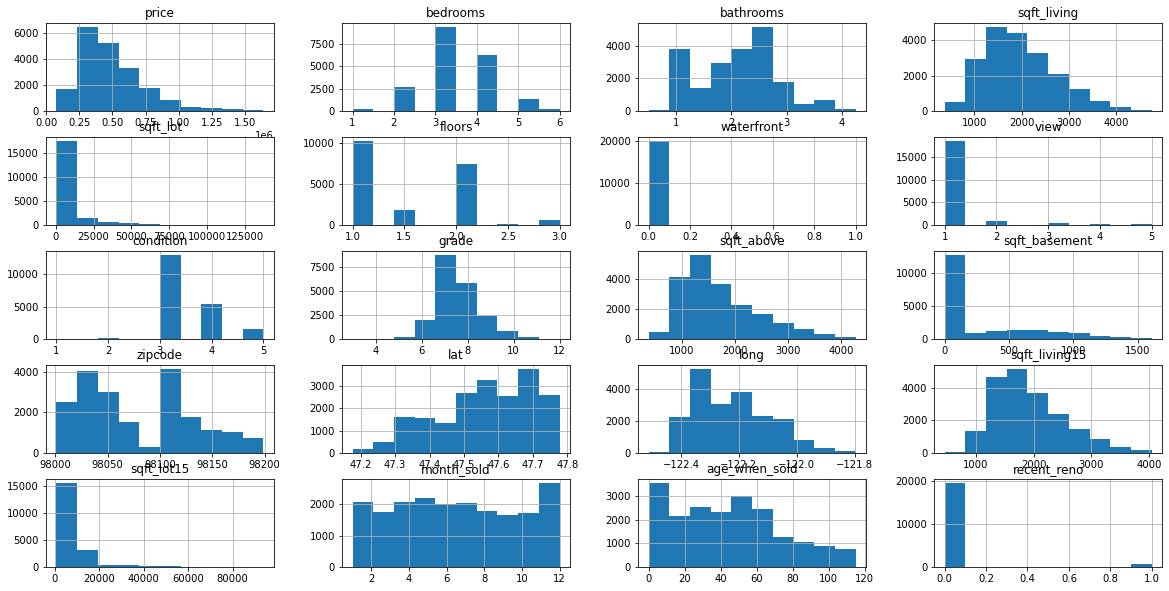

In [193]:
df2.hist(figsize  = [20, 10]); 

In [194]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,20033.0,494644.018220,246014.866897,78000.0000,315000.0000,440000.0000,615000.0000,1.640000e+06
bedrooms,20033.0,3.324515,0.856792,1.0000,3.0000,3.0000,4.0000,6.000000e+00
bathrooms,20033.0,2.049443,0.695429,0.5000,1.5000,2.0000,2.5000,4.250000e+00
sqft_living,20033.0,1968.525633,749.149181,370.0000,1400.0000,1860.0000,2440.0000,4.750000e+03
sqft_lot,20033.0,9965.885888,11626.855294,520.0000,5000.0000,7375.0000,9994.0000,1.372140e+05
floors,20033.0,1.481081,0.538774,1.0000,1.0000,1.0000,2.0000,3.000000e+00
waterfront,20033.0,0.003594,0.059844,0.0000,0.0000,0.0000,0.0000,1.000000e+00
view,20033.0,1.154894,0.600783,1.0000,1.0000,1.0000,1.0000,5.000000e+00
condition,20033.0,3.413767,0.651219,1.0000,3.0000,3.0000,4.0000,5.000000e+00
grade,20033.0,7.550342,1.047339,3.0000,7.0000,7.0000,8.0000,1.200000e+01


In [195]:
df = df2.copy()

In [196]:
df.shape

(20033, 20)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20033 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20033 non-null  float64
 1   bedrooms       20033 non-null  int64  
 2   bathrooms      20033 non-null  float64
 3   sqft_living    20033 non-null  int64  
 4   sqft_lot       20033 non-null  int64  
 5   floors         20033 non-null  float64
 6   waterfront     20033 non-null  int64  
 7   view           20033 non-null  float64
 8   condition      20033 non-null  float64
 9   grade          20033 non-null  float64
 10  sqft_above     20033 non-null  int64  
 11  sqft_basement  20033 non-null  int64  
 12  zipcode        20033 non-null  int64  
 13  lat            20033 non-null  float64
 14  long           20033 non-null  float64
 15  sqft_living15  20033 non-null  int64  
 16  sqft_lot15     20033 non-null  int64  
 17  month_sold     20033 non-null  int64  
 18  age_wh

In [198]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,20033.0,494644.018220,246014.866897,78000.0000,315000.0000,440000.0000,615000.0000,1.640000e+06
bedrooms,20033.0,3.324515,0.856792,1.0000,3.0000,3.0000,4.0000,6.000000e+00
bathrooms,20033.0,2.049443,0.695429,0.5000,1.5000,2.0000,2.5000,4.250000e+00
sqft_living,20033.0,1968.525633,749.149181,370.0000,1400.0000,1860.0000,2440.0000,4.750000e+03
sqft_lot,20033.0,9965.885888,11626.855294,520.0000,5000.0000,7375.0000,9994.0000,1.372140e+05
floors,20033.0,1.481081,0.538774,1.0000,1.0000,1.0000,2.0000,3.000000e+00
waterfront,20033.0,0.003594,0.059844,0.0000,0.0000,0.0000,0.0000,1.000000e+00
view,20033.0,1.154894,0.600783,1.0000,1.0000,1.0000,1.0000,5.000000e+00
condition,20033.0,3.413767,0.651219,1.0000,3.0000,3.0000,4.0000,5.000000e+00
grade,20033.0,7.550342,1.047339,3.0000,7.0000,7.0000,8.0000,1.200000e+01


In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(15,15))
#sns.heatmap(df.corr(), annot=True, square=True, cmap= "Blues", mask=np.triu(np.ones_like(df.corr(), dtype=bool)),)
sns.heatmap(df.corr(), annot=True, square=True, cmap= "Blues")

Based on the plot above, which feature is most strongly correlated with the target (`listing_price`)? In other words, which feature has the strongest positive or negative correlation — the correlation with the greatest magnitude?

In [ ]:

most_correlated = "grade"

(Make sure you run the cell above before proceeding.)

Let's create a scatter plot of that feature vs. listing price:

In [ ]:
fig, ax = plt.subplots()

ax.scatter(df[most_correlated], df['price'], alpha=0.5)
ax.set_xlabel(most_correlated)
ax.set_ylabel("price")
ax.set_title("Most Correlated Feature vs. Listing Price");

Assuming you correctly identified `piece_count` (the number of pieces in the LEGO set) as the most correlated feature, you should have a scatter plot that shows a fairly clear linear relationship between that feature and the target. It looks like we are ready to proceed with making our baseline model without any additional transformation.

### Building a Baseline Model

Now, we'll build a linear regression model using just that feature, which will serve as our baseline model:

In [ ]:
baseline_model = LinearRegression()

In [ ]:

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)


In [ ]:
baseline_scores = cross_validate(
    estimator=baseline_model,
    X=df[[most_correlated]],
    y=df['price'],
    return_train_score=True,
    cv=splitter
)

baseline_scores

In [ ]:
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Then we evaluate the model using `cross_validate` and `ShuffleSplit`, which essentially means that we perform 3 separate train-test splits within our `X_train` and `y_train`, then we find both the train and the test scores for each.

Interpret these scores below. What are we measuring? What can we learn from this?

**Hint:** when you use `cross_validate`, it uses the `.score` method of the estimator by default. See [documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) for that method of `LinearRegression`.

In [ ]:
# Replace None with appropriate text
"""
These scores represent the R^2 values. Both the Train score and Validation Model have essentially the same score, which shows our
linear regression model is a good baseline model.
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>Because we are using the <code>.score</code> method of <code>LinearRegression</code>, these are r-squared scores. That means that each of them represents the amount of variance of the target (listing price) that is explained by the model's features (currently just the number of pieces) and parameters (intercept value and coefficient values for the features)</p>
    <p>In general this seems like a fairly strong model already. It is getting nearly identical performance on training subsets compared to the validation subsets, explaining around 80% of the variance both times</p>
</details>

## 2. Build a Model with All Numeric Features

Now that we have established a baseline, it's time to move on to more complex models.

### Numeric Feature Selection

One thing that you will almost always need to do in a modeling process is remove non-numeric data prior to modeling. While you could apply more-advanced techniques such as one-hot encoding or NLP in order to convert non-numeric columns into numbers, this time just create a dataframe `X_train_numeric` that is a copy of `X_train` that only contains numeric columns.

You can look at the `df.info()` printout above to do this manually, or there is a handy `.select_dtypes` method ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)).

In [ ]:
df.info()

In [ ]:
scatterplot_data = df.drop("price",axis=1)

fig, axes = plt.subplots(ncols=3, nrows=7, figsize=(15, 20))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(df[col], df["price"], alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

In [ ]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=df.drop("price",axis=1),
    y=df['price'],
    return_train_score=True,
    cv=splitter
)

print("Current Model - Linear Regression with all Features")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model - Linear Regression with only Most Correlated Feature")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

In [ ]:
sm.OLS(df['price'], sm.add_constant(df.drop("price",axis=1))).fit().summary()

The following code checks that your answer was correct:

Now we can look at scatter plots of all numeric features compared to the target (skipping `piece_count` since we already looked at that earlier):

### Feature Selection Using Domain Understanding

Ok, now all of the remaining features can technically go into a model with scikit-learn. But do they make sense?

Some reasons you might not want to include a given numeric column include:

1. The column represents a unique identifier, not an actual numeric feature
2. The column is something that will not be available when making future predictions

Recall that the business purpose here is creating an algorithm to set the price for a newly-released LEGO set. Which columns should we drop because of the issues above?

In [ ]:
# Replace None with appropriate text
"""
Drop num reviews, star rating, and product id
"""

 <details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>The first issue aligns with the first feature we have, <code>prod_id</code></p>
    <p>While it is possible that there is some useful information encoded in that number, it seems like it is not really a numeric feature in the traditional sense</p>
    <p>The scatter plot supports this idea, since it shows almost all prices being represented by a narrow range of ID values</p>
    <p>The second issue aligns with <code>num_reviews</code> and <code>star_rating</code>. Although these might be useful features in some modeling context, they are not useful for this algorithm because we won't know the number of reviews or the star rating until after the LEGO set is released.</p>
</details>

Now, create a variable `X_train_second_model`, which is a copy of `X_train_numeric` where those irrelevant columns have been removed:

### Building and Evaluating the Second Model

In the cell below, we use the same process to evaluate a model using `X_train_second_model` rather than using just `piece_count`.

Interpret these results. Did our second model perform better than the baseline? Any ideas about why or why not?

**Hint:** because the purpose of this model is to set future prices that have not been determined yet, the most important metric for evaluating model performance is the validation score, not the train score.

In [ ]:
# Replace None with appropriate text
"""
I think it got worse.
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>Our second model got slightly better scores on the training data, but worse scores on the validation data. This means that it is a worse model overall, since what we care about is the ability to generate prices for future LEGO sets, not the ability to fit well to the known LEGO sets' features</p>
    <p>It seems like adding in these other features is actually just causing overfitting, rather than improving the model's ability to understand the underlying patterns in the data</p>
</details>

## 3. Select the Best Combination of Features

As you likely noted above, adding all relevant numeric features did not actually improve the model performance. Instead, it led to overfitting.

### Investigating Multicollinearity

This potentially indicates that our model is performing poorly because these features violate the independence assumption (i.e. there is strong multicollinearity). In other words, maybe the minimum age, maximum age, and difficulty level are not really providing different information than the number of pieces in the LEGO set, and instead are just adding noise. Then the model is using that noise to get a slightly better score on the training data, but but a worse score on the validation data.

While `LinearRegression` from scikit-learn has a lot of nice functionality for working with a predictive framing (e.g. compatibility with the `cross_validate` function), it doesn't have anything built in to detect strong multicollinearity. Fortunately the same linear regression model is also available from StatsModels ([documentation here](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html)), where it is called `OLS` (for "ordinary least squares"). Models in StatsModels, including `OLS`, are not really designed for predictive model validation, but they do give us a lot more statistical information.

In the cell below, we use StatsModels to fit and evaluate a linear regression model on the same features used in the second model. Note that we will only see one r-squared value (not train and validation r-squared values) because it is using the full `X_train` dataset instead of using cross-validation.

In [ ]:
# Run this cell without changes

import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

A condition number of 10-30 indicates multicollinearity, and a condition number above 30 indicates strong multicollinearity. This print-out shows a condition number of `2.85e+03`, i.e. 2770, which is well above 30.

In a predictive context (we are currently trying to build a model to assign prices to future LEGO sets, not a model primarily intended for understanding the relationship between prices and attributes of past LEGO sets), we do not *always* need to be worried when we identify strong multicollinearity. Sometimes there are features that are highly collinear but they also are individually communicating useful information to the model. In this case, however, it seems like strong multicollinearity might be what is causing our second model to have worse performance than the first model.

### Selecting Features Based on p-values

Given that we suspect our model's issues are related to multicollinearity, let's try to narrow down those features. In this case, let's use the p-values assigned to the coefficients of the model.

Looking at the model summary above, ***which features are statistically significant, with p-values below 0.05***? (P-values are labeled **P>|t|** in a StatsModels summary.)

In [ ]:
# Replace None with appropriate text
"""
piece count and min age
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p><code>const</code> (the intercept), <code>piece_count</code>, and <code>min_age</code></p>
</details>

**Important note:** There are many limitations to using coefficient p-values to select features. See [this StackExchange answer](https://stats.stackexchange.com/a/291239) with examples in R for more details. The suggested alternative in that answer, `glmnet`, is a form of *regularization*, which you will learn about later. Another related technique is *dimensionality reduction*, which will also be covered later. However for now you can proceed using just the p-values technique until the more-advanced techniques have been covered.

In the cell below, create a list `significant_features` that contains the names of the columns whose features have statistically significant coefficient p-values. You should not include `"const"` in that list because `LinearRegression` from scikit-learn automatically adds a constant term and there is no column of `X_train` called `"const"`.

(You do not need to extract this information programmatically, just write them out like `"column_name_1", "column_name_2"` etc.)

In [ ]:
# Replace None with appropriate code
significant_features = ["piece_count", "min_age"]

Now let's build a model using those significant features only:

In [ ]:
# Run this cell without changes
third_model = LinearRegression()
X_train_third_model = X_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Interpret the results below. What happened when we removed the features with high p-values?

In [ ]:
# Replace None with appropriate text
"""
Still looks basically the same performance to me
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>Removing those features led to the best model so far, although the scores are very similar to the baseline</p>
</details>

### Selecting Features with `sklearn.feature_selection`

Let's try a different approach. Scikit-learn has a submodule called `feature_selection` that includes tools to help reduce the feature set.

We'll use `RFECV` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV)). "RFE" stands for "recursive feature elimination", meaning that it repeatedly scores the model, finds and removes the feature with the lowest "importance", then scores the model again. If the new score is better than the previous score, it continues removing features until the minimum is reached. "CV" stands for "cross validation" here, and we can use the same splitter we have been using to test our data so far.

In [ ]:
# Run this cell without changes

from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Interesting. So, this algorithm is saying that our baseline model, with `piece_count` as the only feature, is the best one it could find.

However, note that this is based on the "importances" of the features, which means the coefficients in the context of a linear regression. It is possible that we can still get a better model by including multiple features, if we try removing columns using a different strategy.

### A Brute Force Approach

Given that we have only four columns and only a few hundred rows, one other option we have is something more computationally expensive: write custom code that goes over multiple different permutations of the columns, to see if we can find something better than the p-values approach or the `RFECV` approach.

The code below assumes that we want to keep the `piece_count` column, then attempts a linear regression with all possible combinations of 1-2 additional features. Don't worry too much if you don't understand everything that is happening here — an approach like this should be a last resort and you may not ever need to use it!

In [ ]:
# Run this cell without changes

from itertools import combinations

features = ["piece_count", "min_age", "max_age", "difficulty_level"]

# Make a dataframe to hold the results (not strictly necessary
# but it makes the output easier to read)
results_df = pd.DataFrame(columns=features)

# Selecting just piece_count
results_df = results_df.append({
    "train_score": baseline_scores["train_score"].mean(),
    "val_score": baseline_scores["test_score"].mean()
}, ignore_index=True)

# Selecting 1 additional feature
for feature in features[1:]:
    scores = cross_validate(
        estimator=second_model,
        X=X_train[["piece_count", feature]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    # Note: this technique of appending to a df is quite inefficient
    # Here it works because it's only happening 6 times, but avoid
    # doing this for a whole dataset
    results_df = results_df.append({
        feature: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Selecting 2 additional features
for (feature1, feature2) in list(combinations(features[1:], 2)):
    scores = cross_validate(
        estimator=second_model,
        X=X_train[["piece_count", feature1, feature2]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Including all 3 additional features
results_df = results_df.append({
    "min_age": "Yes", "max_age": "Yes", "difficulty_level": "Yes",
    "train_score": second_model_scores["train_score"].mean(),
    "val_score": second_model_scores["test_score"].mean()
}, ignore_index=True)

# Fill in remaining values where appropriate
results_df["piece_count"] = "Yes"
results_df.fillna("No", inplace=True)

results_df

Interpret the table above. It shows both training and validation scores for `piece_count` as well as all combinations of 0, 1, 2, or 3 other features.

Which features make the best model? Which make the worst? How does this align with the previous discussion of multicollinearity? And how much does feature selection seem to matter in general for this dataset + model algorithm, once we have identified the most correlated feature for the baseline?

In [ ]:
# Replace None with appropriate text
"""
in my opinion, the differences seem negiligible as long as piece count is the main feature for the model. row 6 has best val score. 
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>The best model uses <code>piece_count</code>, <code>max_age</code>, and <code>difficulty_level</code>. It has a validation score of 0.781578</p>
    <p>The worst model uses <code>piece_count</code>, <code>min_age</code>, and <code>max_age</code>. It has a validation score of 0.751768</p>
    <p>This makes sense if we think that <code>min_age</code> and <code>max_age</code> are mostly providing the same information, and that the difference is mainly noise (leading to overfitting), that the best model would only have one of them</p>
    <p>Overall, feature selection does not seem to matter very much for this dataset + linear regression. So long as we use our most correlated feature (<code>piece_count</code>), the validation score doesn't change very much, regardless of which other features are included.</p>
</details>

## 4. Build and Evaluate a Final Predictive Model

In the cell below, create a list `best_features` which contains the names of the best model features based on the findings of the previous step:

In [ ]:
# Replace None with appropriate code
best_features = ["piece_count", "max_age", "difficulty_level"]

Now, we prepare the data for modeling:

In [ ]:
# Run this cell without changes
X_train_final = X_train[best_features]
X_test_final = X_test[best_features]

In the cell below, instantiate a `LinearRegression` model called `final_model`, then fit it on the training data and score it on the test data.

In [ ]:
# Replace None with appropriate code

final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_final, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score( X_test_final, y_test)

### User-Friendly Metrics

The score above is an r-squared score. Let's compute the RMSE as well, since this would be more applicable to a business audience.

In [ ]:
# Run this cell without changes
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)

What does this value mean in the current business context?

In [ ]:
# Replace None with appropriate text
"""
The RMSE is around 47.4.
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>This means that for an average LEGO set, this algorithm will be off by about $47. Given that most LEGO sets sell for less than $100, we would definitely want to have a human double-check and adjust these prices rather than just allowing the algorithm to set them</p>
</details>

## 5. Interpret the Final Model

Below, we display the coefficients and intercept for the final model:

In [ ]:
# Run this cell without changes
print(pd.Series(final_model.coef_, index=X_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

Interpret these values below. What is the pricing algorithm you have developed?

In [ ]:
# Replace None with appropriate text
"""
The intercept is 9.6. That's the starting point of pricing, as if a lego set had 0 pieces! 
Price goes up with piece count and difficulty level, but down with max age.
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>According to our model, the base price for a LEGO set (the model intercept) is about $9.68. Then for each additional LEGO piece in the set, the price goes up by $0.09 per piece. For every year higher that the maximum age is, the price goes down by about $0.04. Then finally for every increase of 1 in the difficulty level, the price goes up by about $2.04.</p>
</details>

Before assuming that these coefficients give us inferential insight into past pricing decisions, we should investigate each of the assumptions of linear regression, in order to understand how much our model violates them.

### Investigating Linearity

First, let's check whether the linearity assumption holds.

In [ ]:
# Run this cell without changes

preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

Are we violating the linearity assumption?

In [ ]:
# Replace None with appropriate text
"""
Not violating linearity assumption
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>We have some outliers that are all over the place, but in general it looks like we have a linear relationship (not violating this assumption)</p>
</details>

### Investigating Normality

Now let's check whether the normality assumption holds for our model.

In [ ]:
# Run this code without changes
import scipy.stats as stats

residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Are we violating the normality assumption?

In [ ]:
# Replace None with appropriate text
"""
Graph looks off. I would say we could be violating normality.
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>Our outliers are again causing problems. This is bad enough that we can probably say that we are violating the normality assumption</p>
</details>

### Investigating Multicollinearity (Independence Assumption)

Another way to measure multicollinearity is with [variance inflation factor](https://en.wikipedia.org/wiki/Variance_inflation_factor) ([StatsModels documentation here](https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html#statsmodels.stats.outliers_influence.variance_inflation_factor)). A "rule of thumb" for VIF is that 5 is too high (i.e. strong multicollinearity).

Run the code below to find the VIF for each feature.

In [ ]:
# Run this cell without changes
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

Do we have too high of multicollinearity?

In [ ]:
# Replace None with appropriate text
"""
No.
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>We are below 5 for all features in the final model, so we don't have too high of multicollinearity</p>
</details>

### Investigating Homoscedasticity

Now let's check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

In [ ]:
# Run this cell without changes
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

Are we violating the homoscedasticity assumption?

In [ ]:
# Replace None with appropriate text
"""
looks like violating homoscedasticity. this looks more hetero
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>This is not the worst "funnel" shape, although the residuals do seem to differ some based on the predicted price. We are probably violating a strict definition of homoscedasticity.</p>
</details>

### Linear Regression Assumptions Conclusion

Given your answers above, how should we interpret our model's coefficients? Do we have a model that can be used for inferential as well as predictive purposes? What might your next steps be?

In [ ]:
# Replace None with appropriate text
"""
I think the model is good enough but not perfect. I wouldn't present it to my boss without further refinement.
"""

<details>
    <summary style="cursor: pointer">Solution (click to reveal)</summary>
    <p>Our confidence in these coefficients should not be too high, since we are violating or close to violating more than one of the assumptions of linear regression. This really only should be used for predictive purposes.</p>
    <p>A good next step here would be to start trying to figure out why our outliers behave the way they do. Maybe there is some information we could extract from the text features that are currently not part of the model</p>
</details>

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements.